In [1]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/validation'
#nb_train_samples = 2000
#nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

lrr= ReduceLROnPlateau(
                       monitor='val_accuracy', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 2682 images belonging to 2 classes.
Found 820 images belonging to 2 classes.


In [7]:
nb_train_samples=2682
nb_validation_samples=820

In [9]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[lrr])

model.save_weights('second_try.h5')

Epoch 1/50
167/167 [==============================] - 54s 323ms/step - loss: 0.3042 - accuracy: 0.8968 - val_loss: 0.2151 - val_accuracy: 0.9252
Epoch 2/50
167/167 [==============================] - 54s 321ms/step - loss: 0.2600 - accuracy: 0.9119 - val_loss: 0.3838 - val_accuracy: 0.8934
Epoch 3/50
167/167 [==============================] - 54s 323ms/step - loss: 0.2212 - accuracy: 0.9197 - val_loss: 0.2016 - val_accuracy: 0.9277
Epoch 4/50
167/167 [==============================] - 53s 319ms/step - loss: 0.1932 - accuracy: 0.9321 - val_loss: 0.1971 - val_accuracy: 0.9301
Epoch 5/50
167/167 [==============================] - 53s 320ms/step - loss: 0.1800 - accuracy: 0.9385 - val_loss: 0.1897 - val_accuracy: 0.9375
Epoch 6/50
167/167 [==============================] - 53s 320ms/step - loss: 0.1715 - accuracy: 0.9415 - val_loss: 0.2590 - val_accuracy: 0.9252
Epoch 7/50
167/167 [==============================] - 54s 320ms/step - loss: 0.1758 - accuracy: 0.9437 - val_loss: 0.1584 - val_ac

In [11]:
import numpy as np

In [12]:
from matplotlib import pyplot as plt

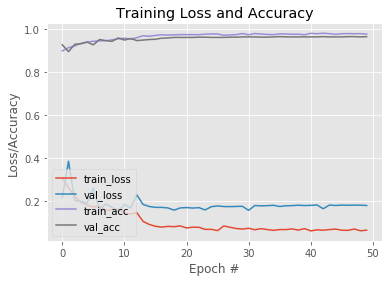

In [13]:
N = 50

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")